In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [2]:
data=pd.read_csv("rvnl.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1105 non-null   object 
 1   Price     1105 non-null   float64
 2   Open      1105 non-null   float64
 3   High      1105 non-null   float64
 4   Low       1105 non-null   float64
 5   Vol.      1104 non-null   object 
 6   Change %  1105 non-null   object 
dtypes: float64(4), object(3)
memory usage: 60.6+ KB


In [4]:
data=data.iloc[::-1]

In [5]:
data

,Date,Price,Open,High,Low,Vol.,Change %
1104,01-01-2020,23.00,23.05,23.30,22.95,3.13M,0.22%
1103,02-01-2020,23.75,23.05,23.90,22.90,7.74M,3.26%
1102,03-01-2020,25.05,23.60,25.30,23.60,17.98M,5.47%
1101,06-01-2020,23.85,24.65,24.80,23.65,7.95M,-4.79%
1100,07-01-2020,24.55,24.15,25.05,24.00,8.53M,2.94%
...,...,...,...,...,...,...,...
4,06-06-2024,368.65,369.80,383.75,365.05,43.19M,4.34%
3,07-06-2024,374.55,374.00,382.00,370.40,27.25M,1.60%
2,10-06-2024,373.95,383.65,386.80,369.10,22.56M,-0.16%
1,11-06-2024,389.40,381.50,392.45,379.00,43.44M,4.13%


In [6]:
df=data.reset_index()["Price"]

In [7]:
df

0        23.00
1        23.75
2        25.05
3        23.85
4        24.55
         ...  
1100    368.65
1101    374.55
1102    373.95
1103    389.40
1104    392.65
Name: Price, Length: 1105, dtype: float64

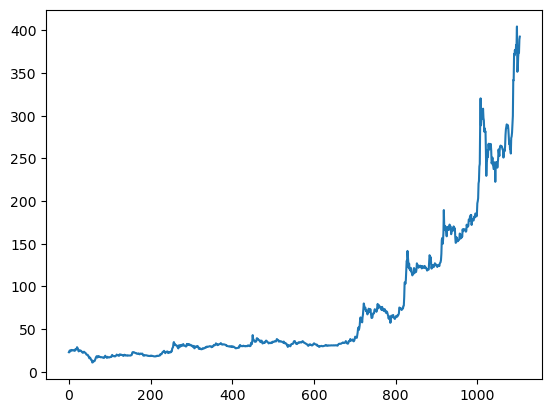

In [8]:
plt.plot(df)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))

In [11]:
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
df1

array([[0.03049168],
       [0.03239741],
       [0.03570067],
       ...,
       [0.92224622],
       [0.96150426],
       [0.96976242]])

#### Splitting Data

In [17]:
n=len(df1)
n

1105

In [22]:
train_size=int(n*0.7)
train_size

773

In [23]:
test_size=n-train_size
test_size

332

In [24]:
train_data=df1[:train_size,:]
test_data=df1[train_size:,:]

In [26]:
train_data.shape

(773, 1)

In [27]:
test_data.shape

(332, 1)

In [28]:
# Timesteps = > used to determine the features of the predictions of current data

In [29]:


def create_dataset(data,time_stamp=10):
    dX,dY=[],[]
    
    for i in range(len(data)-time_stamp-1):
        a=data[i:i+time_stamp,0]
        dX.append(a)
        dY.append(data[i+time_stamp,0])
    return np.array(dX),np.array(dY)

In [30]:
time_stamp=100
X_train,y_train=create_dataset(train_data,time_stamp)
X_test,y_test=create_dataset(test_data,time_stamp)

In [32]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(672, 100) (672,) (231, 100) (231,)


In [35]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [37]:
X_test.shape

(231, 100, 1)

#### Model Building

In [49]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [50]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
11/11 [==============================] - 8s 353ms/step - loss: 0.0012 - val_loss: 0.0743
Epoch 2/100
11/11 [==============================] - 3s 237ms/step - loss: 2.6227e-04 - val_loss: 0.0080
Epoch 3/100
11/11 [==============================] - 3s 249ms/step - loss: 1.3855e-04 - val_loss: 0.0079
Epoch 4/100
11/11 [==============================] - 2s 216ms/step - loss: 1.0785e-04 - val_loss: 0.0050
Epoch 5/100
11/11 [==============================] - 2s 223ms/step - loss: 8.7688e-05 - val_loss: 0.0064
Epoch 6/100
11/11 [==============================] - 3s 231ms/step - loss: 8.5038e-05 - val_loss: 0.0052
Epoch 7/100
11/11 [==============================] - 2s 224ms/step - loss: 7.5150e-05 - val_loss: 0.0049
Epoch 8/100
11/11 [==============================] - 3s 230ms/step - loss: 6.9877e-05 - val_loss: 0.0049
Epoch 9/100
11/11 [==============================] - 3s 253ms/step - loss: 6.2732e-05 - val_loss: 0.0050
Epoch 10/100
11/11 [==============================] - 3s 26

11/11 [==============================] - 3s 256ms/step - loss: 2.9061e-05 - val_loss: 0.0024
Epoch 79/100
11/11 [==============================] - 3s 262ms/step - loss: 3.0543e-05 - val_loss: 0.0028
Epoch 80/100
11/11 [==============================] - 3s 251ms/step - loss: 3.1377e-05 - val_loss: 0.0035
Epoch 81/100
11/11 [==============================] - 3s 262ms/step - loss: 2.8062e-05 - val_loss: 0.0034
Epoch 82/100
11/11 [==============================] - 3s 245ms/step - loss: 2.6044e-05 - val_loss: 0.0033
Epoch 83/100
11/11 [==============================] - 3s 263ms/step - loss: 2.7264e-05 - val_loss: 0.0036
Epoch 84/100
11/11 [==============================] - 3s 268ms/step - loss: 3.1027e-05 - val_loss: 0.0029
Epoch 85/100
11/11 [==============================] - 3s 249ms/step - loss: 2.7950e-05 - val_loss: 0.0034
Epoch 86/100
11/11 [==============================] - 3s 254ms/step - loss: 2.6229e-05 - val_loss: 0.0055
Epoch 87/100
11/11 [==============================] - 3s 24

In [53]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 2s 76ms/step


In [55]:
train_predict_org=scaler.inverse_transform(train_predict)
test_predict_org=scaler.inverse_transform(test_predict)

In [56]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict_org))

35.35971654653371

In [57]:
math.sqrt(mean_squared_error(y_test,test_predict_org))

206.71340493159744

In [58]:
import matplotlib.pyplot as plt

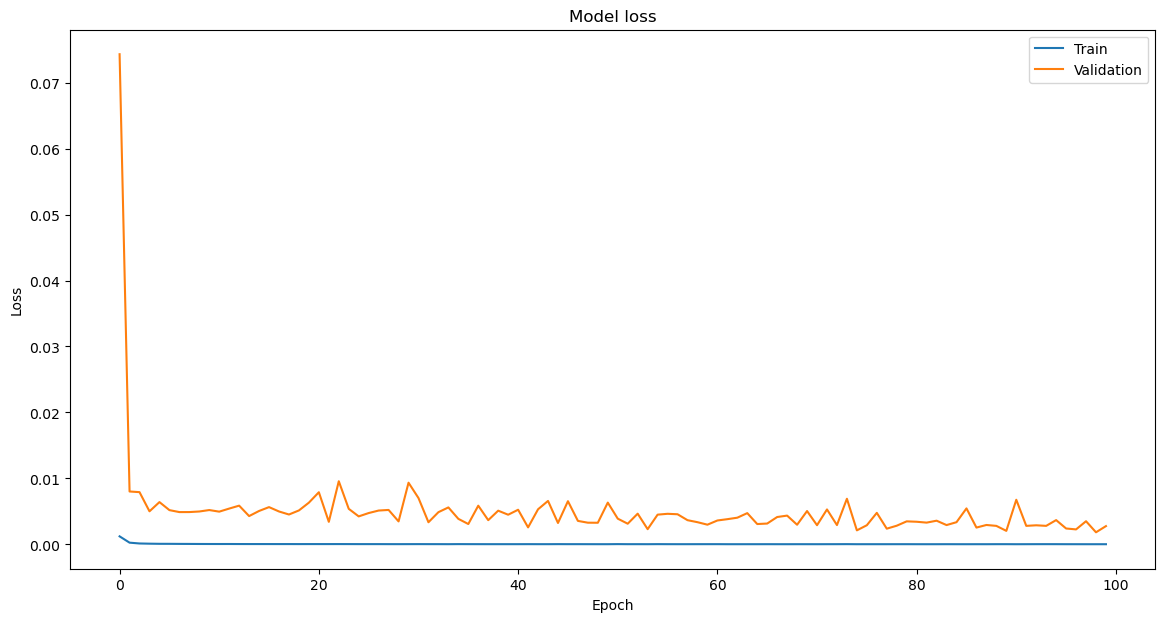

In [59]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [72]:
import numpy

In [73]:
look_back=100
train_pp=numpy.empty_like(df1)
train_pp[:,:]=np.nan
train_pp[look_back:len(train_predict_org)+look_back,:]=train_predict_org

test_pp=numpy.empty_like(df1)
test_pp[:,:]=np.nan
test_pp[len(train_predict_org)+look_back*2 +1:len(df1)-1,:]=test_predict_org



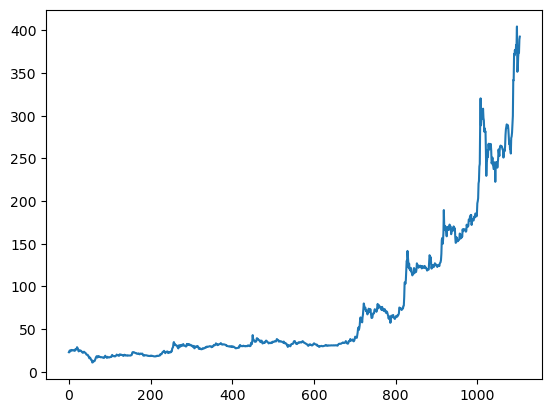

In [74]:
plt.plot(scaler.inverse_transform(df1))

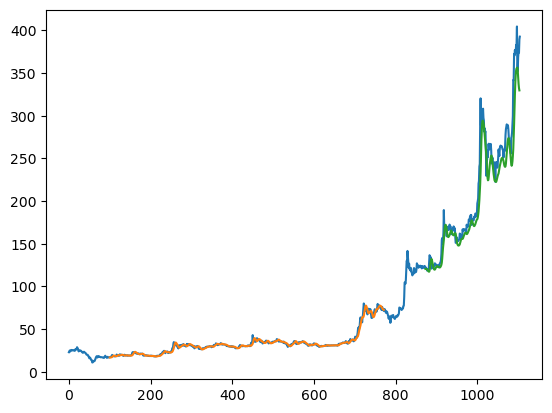

In [75]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_pp)
plt.plot(test_pp)
plt.show()

In [76]:
test_data.shape

(332, 1)

In [80]:
x_input=test_data[232:].reshape(1,-1)
x_input.shape

(1, 100)

In [81]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [82]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input),len(x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8235779]
101
1 day input [0.59103036 0.71210774 0.78605006 0.7057553  0.73141913 0.73929615
 0.73192733 0.7248126  0.75530428 0.72811587 0.72049295 0.6869521
 0.69673485 0.68568162 0.68784144 0.6307966  0.55545674 0.59636641
 0.60437047 0.63117774 0.61161225 0.64858341 0.65112438 0.63359167
 0.63613264 0.6443908  0.65036209 0.65023504 0.63016135 0.592682
 0.59763689 0.60970652 0.58836234 0.58505908 0.57565748 0.57667387
 0.59573117 0.59064922 0.53766993 0.59077627 0.59598526 0.59306314
 0.59573117 0.57985008 0.59331724 0.60691145 0.63384576 0.62253843
 0.61466142 0.63714903 0.64388261 0.64553424 0.64273917 0.64312032
 0.64337441 0.63803837 0.63308347 0.63321052 0.60983357 0.62736628
 0.63244823 0.62876382 0.64324736 0.67678821 0.69432092 0.70168975
 0.70867742 0.70588235 0.69978402 0.7060094  0.69393978 0.67412019
 0.65010799 0.65798501 0.63537035 0.63537035 0.62190319 0.6681489
 0.67234151 0.68415703 0.7109643  0.73357896 0.84042688 0.83953754
 0.91792657 0.91347986 0.92999619 0.92

10 day output [[0.6003926]]
11 day input [0.72049295 0.6869521  0.69673485 0.68568162 0.68784144 0.6307966
 0.55545674 0.59636641 0.60437047 0.63117774 0.61161225 0.64858341
 0.65112438 0.63359167 0.63613264 0.6443908  0.65036209 0.65023504
 0.63016135 0.592682   0.59763689 0.60970652 0.58836234 0.58505908
 0.57565748 0.57667387 0.59573117 0.59064922 0.53766993 0.59077627
 0.59598526 0.59306314 0.59573117 0.57985008 0.59331724 0.60691145
 0.63384576 0.62253843 0.61466142 0.63714903 0.64388261 0.64553424
 0.64273917 0.64312032 0.64337441 0.63803837 0.63308347 0.63321052
 0.60983357 0.62736628 0.63244823 0.62876382 0.64324736 0.67678821
 0.69432092 0.70168975 0.70867742 0.70588235 0.69978402 0.7060094
 0.69393978 0.67412019 0.65010799 0.65798501 0.63537035 0.63537035
 0.62190319 0.6681489  0.67234151 0.68415703 0.7109643  0.73357896
 0.84042688 0.83953754 0.91792657 0.91347986 0.92999619 0.92122983
 0.92681997 0.94473383 0.94193876 1.         0.86520137 0.86977512
 0.90877906 0.9237708  

20 day output [[0.44909656]]
21 day input [0.61161225 0.64858341 0.65112438 0.63359167 0.63613264 0.6443908
 0.65036209 0.65023504 0.63016135 0.592682   0.59763689 0.60970652
 0.58836234 0.58505908 0.57565748 0.57667387 0.59573117 0.59064922
 0.53766993 0.59077627 0.59598526 0.59306314 0.59573117 0.57985008
 0.59331724 0.60691145 0.63384576 0.62253843 0.61466142 0.63714903
 0.64388261 0.64553424 0.64273917 0.64312032 0.64337441 0.63803837
 0.63308347 0.63321052 0.60983357 0.62736628 0.63244823 0.62876382
 0.64324736 0.67678821 0.69432092 0.70168975 0.70867742 0.70588235
 0.69978402 0.7060094  0.69393978 0.67412019 0.65010799 0.65798501
 0.63537035 0.63537035 0.62190319 0.6681489  0.67234151 0.68415703
 0.7109643  0.73357896 0.84042688 0.83953754 0.91792657 0.91347986
 0.92999619 0.92122983 0.92681997 0.94473383 0.94193876 1.
 0.86520137 0.86977512 0.90877906 0.9237708  0.92224622 0.96150426
 0.96976242 0.82357788 0.82133722 0.80691063 0.78451467 0.75803888
 0.73006964 0.70207119 0.6747

29 day output [[0.3938698]]
[[0.823577880859375], [0.8213372230529785], [0.8069106340408325], [0.7845146656036377], [0.7580388784408569], [0.730069637298584], [0.7020711898803711], [0.6747992038726807], [0.6486365795135498], [0.6237914562225342], [0.6003925800323486], [0.5785257816314697], [0.558241605758667], [0.539557695388794], [0.5224584341049194], [0.5068987607955933], [0.49280720949172974], [0.4800921380519867], [0.4686471223831177], [0.45835569500923157], [0.44909656047821045], [0.44074752926826477], [0.43318891525268555], [0.4263061285018921], [0.4199920892715454], [0.4141484200954437], [0.40868690609931946], [0.4035296142101288], [0.3986094295978546], [0.3938697874546051]]


In [83]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [85]:
len(df1)

1105

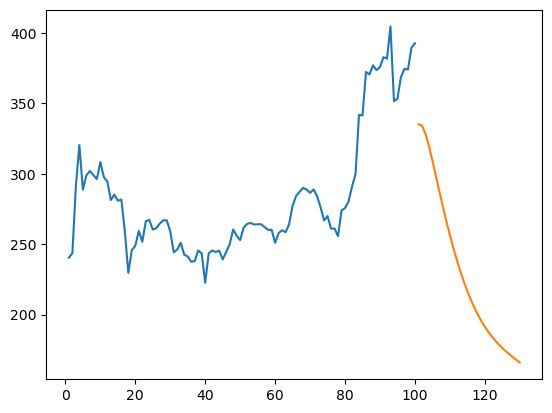

In [86]:
plt.plot(day_new,scaler.inverse_transform(df1[1005:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

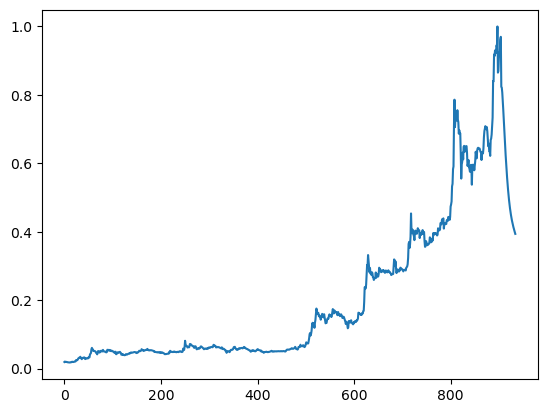

In [89]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[200:])